In [151]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'kullback_leibler_divergence' from 'keras.losses' (c:\Users\destr\anaconda3\envs\phase1\lib\site-packages\keras\losses\__init__.py)

In [105]:
# Membaca dataset 'Books.csv'
book = pd.read_csv('Books.csv')
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [106]:
# Menghapus kolom-kolom yang tidak digunakan
book = book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [107]:
# Membaca dataset 'Ratings.csv'
rating = pd.read_csv('Ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


# EDA

In [108]:
# Menampilkan informasi dataset
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [109]:
# Mencari kolom 'Year-Of-Publication' dengan nilai teks
book[(book['Year-Of-Publication'] == 'DK Publishing Inc') | (book['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [110]:
# Mengganti nilai 'Book-Author' dan 'Year-Of-Publication' pada indeks tertentu
book['Book-Author'].iloc[209538] = 'DK Publishing Inc'
book['Year-Of-Publication'].iloc[209538] = '2000'

book['Book-Author'].iloc[220731] = 'Gallimard'
book['Year-Of-Publication'].iloc[220731] = '2003'

book['Book-Author'].iloc[221678] = 'DK Publishing Inc'
book['Year-Of-Publication'].iloc[221678] = '2000'

# Mengonversi kolom 'Year-Of-Publication' menjadi tipe data integer
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype('int')

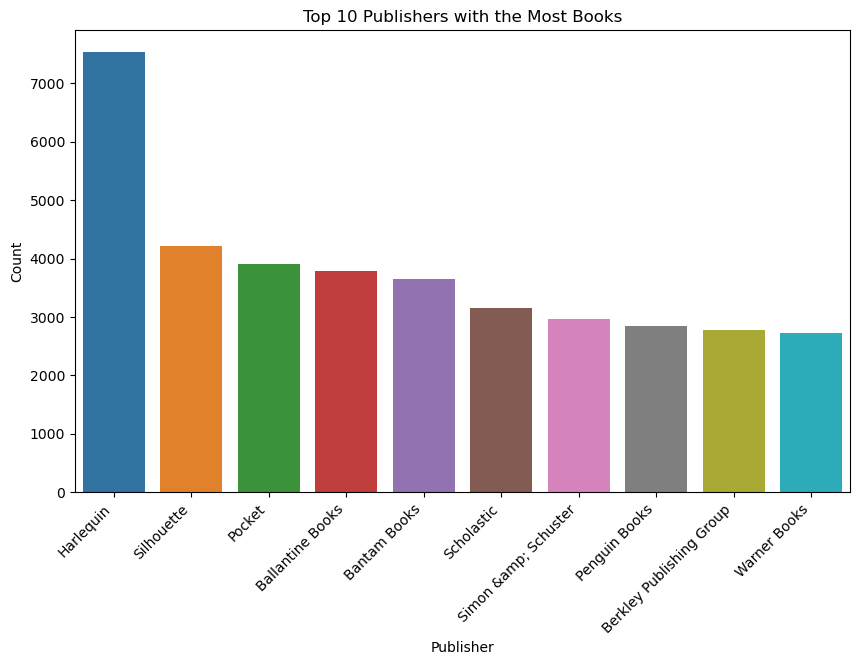

In [111]:
# Mengganti nilai "Bottom Line Pre$$" dengan "Bottom Line Press" dalam kolom 'Publisher'
book['Publisher'] = book['Publisher'].replace("Bottom Line Pre$$", "Bottom Line Press")

# Menghitung jumlah buku yang diterbitkan oleh setiap penerbit
Publisher_count=book['Publisher'].value_counts()

# Membuat DataFrame dari hasil perhitungan jumlah buku per penerbit
Publisher_count_df = pd.DataFrame(Publisher_count)
Publisher_count_df = Publisher_count_df.reset_index()
Publisher_count_df

# Memilih 10 penerbit teratas
top_10_publishers = Publisher_count_df.head(10)

# # Menggambar bar plot untuk menampilkan 10 publisher dengan buku terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_publishers, x="index", y="Publisher")

# Menambahkan judul plot
plt.title('Top 10 Publishers with the Most Books')

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

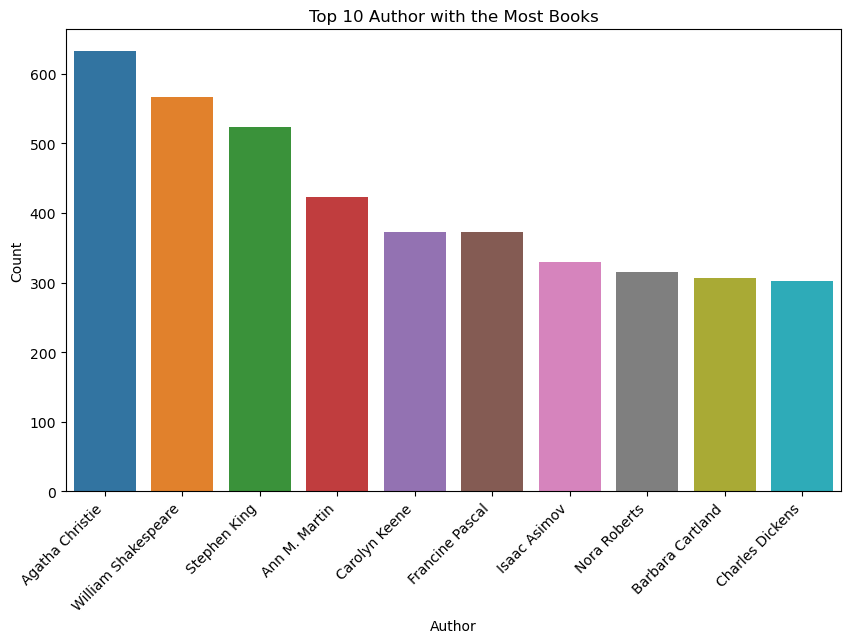

In [112]:
# Menghitung jumlah buku yang ditulis oleh setiap penulis
Author_count=book['Book-Author'].value_counts()

# Membuat DataFrame dari hasil perhitungan jumlah buku per penulis
Author_count_df = pd.DataFrame(Author_count)
Author_count_df = Author_count_df.reset_index()
Author_count_df

# Memilih 10 penulis teratas
top_10_author = Author_count_df.head(10)

# Menggambar bar plot untuk menampilkan 10 penulis dengan buku terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_author, x="index", y="Book-Author")

# Menambahkan judul plot
plt.title('Top 10 Author with the Most Books')

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

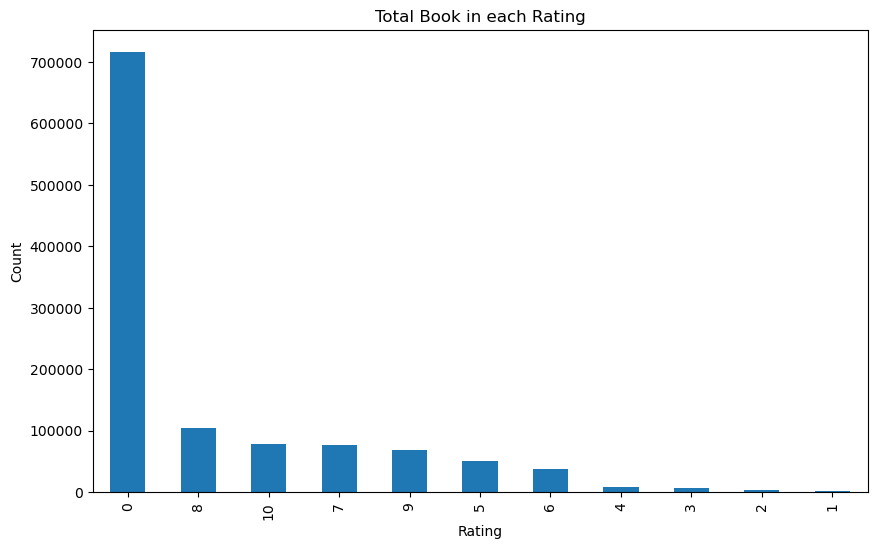

In [113]:
# Menghitung jumlah buku pada tiap nilai rating
count_book_rating = rating['Book-Rating'].value_counts()

# Menampilkan bar plot
plt.figure(figsize=(10, 6))
count_book_rating.plot(kind='bar')
plt.title('Total Book in each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Data Preparation

In [114]:
# Menggabungkan dua DataFrame 'rating' dan 'book' berdasarkan kolom 'ISBN' yang sama
book_user_rating_df = rating.merge(book, left_on = 'ISBN', right_on = 'ISBN')
book_user_rating_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [115]:
# Menampilkan jumlah nilai missing value paka semua kolom
print(book_user_rating_df.isnull().sum())
print(book_user_rating_df.shape)

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64
(1031136, 7)


In [116]:
# Menghapus baris dengan nilai missing value 
book_user_rating_df.dropna(inplace=True)
print(book_user_rating_df.isnull().sum())
print(book_user_rating_df.shape)

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64
(1031133, 7)


In [117]:
# Menghapus baris dengan nilai rating = 0
book_user_rating_df.drop(book_user_rating_df[book_user_rating_df["Book-Rating"] == 0].index, inplace=True)
book_user_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


## Data Preparation: Content Based Filtering

In [118]:
# Menghitung rata-rata peringkat buku berdasarkan ISBN
avg_rating = book_user_rating_df.groupby(['Book-Title'])['Book-Rating'].mean()

# Membuat DataFrame dari hasil perhitungan rata-rata peringkat
avg_rating = pd.DataFrame(avg_rating)
avg_rating = avg_rating.reset_index()

# Mengubah nama kolom 'Book-Rating' menjadi 'Avg-Rating'
content_based_df = avg_rating.rename(columns={"Book-Rating": "Avg-Rating"})
content_based_df

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135560,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135561,Ã?Â?rger mit Produkt X. Roman.,7.000000
135562,Ã?Â?sterlich leben.,7.000000
135563,Ã?Â?stlich der Berge.,8.000000


In [119]:
# Memfilter DataFrame content_based_df untuk baris-baris di mana nilai 'Avg-Rating' sama dengan 10.0
content_based_df = content_based_df[content_based_df['Avg-Rating'] == 10.0].reset_index(drop=True)
content_based_df

,Book-Title,Avg-Rating
0,Dark Justice,10.0
1,Final Fantasy Anthology: Official Strategy Gu...,10.0
2,"The Secret of the Old Clock (Nancy Drew, Book 1)",10.0
3,'California Historical Landmarks',10.0
4,"'Isms: a dictionary of words ending in -ism, -...",10.0
...,...,...
18252,touch the flame,10.0
18253,"Â¡Corre, perro, corre!",10.0
18254,Ã? sucesso solo 50 anni fa: Lo sterminio di se...,10.0
18255,Ã?Â?a,10.0


In [120]:
# Membuat dataframe hanya dengan kolom 'Book-Title' hasil filter sebelumnya
content_based_df = content_based_df[['Book-Title']]
content_based_df

,Book-Title
0,Dark Justice
1,Final Fantasy Anthology: Official Strategy Gu...
2,"The Secret of the Old Clock (Nancy Drew, Book 1)"
3,'California Historical Landmarks'
4,"'Isms: a dictionary of words ending in -ism, -..."
...,...
18252,touch the flame
18253,"Â¡Corre, perro, corre!"
18254,Ã? sucesso solo 50 anni fa: Lo sterminio di se...
18255,Ã?Â?a


## Data Preparation: Collaborative Based Filtering

In [143]:
# Membuat dataframe baru dengan kolom 'User-ID', 'Book-Title', dan 'Book-Rating'
book_user_rating = book_user_rating_df[["User-ID","ISBN","Book-Rating"]]
book_user_rating

,User-ID,ISBN,Book-Rating
1,2313,034545104X,5
3,8680,034545104X,5
4,10314,034545104X,9
9,50403,034545104X,9
13,63970,034545104X,8
...,...,...,...
1031123,276681,1931333246,10
1031124,276683,0316185922,5
1031127,276688,0312264186,8
1031132,276688,1575660792,7


In [145]:
# Menghitung total jumlah peringkat setiap buku berdasarkan judulnya dan mengubah nama kolom menjadi 'Total-Rating-Count'
book_rating_count = book_user_rating.groupby(by=["ISBN"])["Book-Rating"].count().reset_index().rename(columns = {'Book-Rating': 'Total-Rating-Count'})[["ISBN", "Total-Rating-Count"]]
book_rating_count

,ISBN,Total-Rating-Count
0,0000913154,1
1,0001046438,1
2,000104687X,1
3,0001047213,1
4,0001047973,2
...,...,...
149828,B0001FZGPI,1
149829,B0001FZGRQ,1
149830,B0001GMSV2,2
149831,B0001I1KOG,1


In [146]:
# Menggabungkan DataFrame book_user_rating dengan DataFrame book_rating_count berdasarkan kolom 'Book-Title',
book_rating = book_user_rating.merge(book_rating_count, left_on='ISBN', right_on='ISBN', how='left').reset_index(drop=True)
book_rating

,User-ID,ISBN,Book-Rating,Total-Rating-Count
0,2313,034545104X,5,28
1,8680,034545104X,5,28
2,10314,034545104X,9,28
3,50403,034545104X,9,28
4,63970,034545104X,8,28
...,...,...,...,...
383834,276681,1931333246,10,1
383835,276683,0316185922,5,1
383836,276688,0312264186,8,1
383837,276688,1575660792,7,1


In [147]:
# Memilih kolom dengan 'Total-Rating-Count' >= 50
collaborative_filtering_df = book_rating[book_rating['Total-Rating-Count']>=50].reset_index(drop=True)
collaborative_filtering_df

,User-ID,ISBN,Book-Rating,Total-Rating-Count
0,7158,0446520802,10,56
1,8253,0446520802,10,56
2,11676,0446520802,10,56
3,12589,0446520802,9,56
4,13279,0446520802,10,56
...,...,...,...,...
49560,246311,0385503954,8,50
49561,246328,0385503954,9,50
49562,253330,0385503954,9,50
49563,255846,0385503954,9,50


In [148]:
# Menghapus baris duplikat
collaborative_filtering_df.drop_duplicates(['User-ID', 'ISBN'],inplace=True)

# Menghapus kolom 'Total-Rating-Count'
collaborative_filtering_df.drop(columns=['Total-Rating-Count'], inplace=True)
collaborative_filtering_df.reset_index(drop=True)

,User-ID,ISBN,Book-Rating
0,7158,0446520802,10
1,8253,0446520802,10
2,11676,0446520802,10
3,12589,0446520802,9
4,13279,0446520802,10
...,...,...,...
49560,246311,0385503954,8
49561,246328,0385503954,9
49562,253330,0385503954,9
49563,255846,0385503954,9


# Content Based Filtering

## TF-IDF

In [126]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data book_title
tf.fit(content_based_df['Book-Title']) 

TfidfVectorizer()

In [127]:
# Melakukan fitting dan transformasi pada data teks menggunakan TF-IDF Vectorizer
tfidf_matrix = tf.fit_transform(content_based_df['Book-Title']) 
 
# Mengembalikan bentuk matriks TF-IDF yang dihasilkan
tfidf_matrix.shape 

(18257, 19164)

In [128]:
# Mengubah matriks menjadi format dense matriks
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
# Mengonversi matriks TF-IDF menjadi DataFrame Pandas
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=content_based_df['Book-Title']).sample(22, axis=1).sample(10, axis=0)

,capitals,magnum,intimate,leviticus,crawford,workbook,dylan,deat,locklear,planting,...,zeiten,grossology,views,refactoring,hedwig,bizarre,17,vahlens,temporalia,ferrets
Book-Title,,,,,,,,,,,,,,,,,,,,,
Creatures of the Night: The Rocky Horror Experience,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"L'Eveil d'Endymion, tome 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Summer Book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Portrait of Islam: A Journey Through the Muslim World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Complete Illustrated Works Of William Shakespeare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Walks in Gertrude Stein's Paris,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The BIG SNOW (REISSUE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Return to Elysium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bugs Before Time : Prehistoric Insects and Their Relatives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [130]:
# Menghitung similarity antar dokumen menggunakan metode cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Menampilkan Rekomendasi Buku berdasarkan Kata Kunci Judul Buku

In [131]:
def recommendation(words):
    # Mendapatkan indeks buku yang memiliki judul yang mengandung string 'book_title'
    isbn_of_book = content_based_df[content_based_df['Book-Title'].str.contains(words,case=False)].index[0]

    # Mendapatkan similarity score antara buku dengan buku-buku lain
    distances = cosine_sim[isbn_of_book]

    # Mengurutkan dan memilih 10 buku dengan similarity tertinggi (kecuali buku itu sendiri)
    book_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    # Menampilkan judul buku-buku yang direkomendasikan
    for i in book_list:
        print(content_based_df.iloc[i[0]]['Book-Title'])

In [132]:
# Memanggil fungsi 'recommendation' untuk mendapatkan rekomendasi buku dari kata
recommendation('Harry Potter')

Harry Potter and the Prisoner of Azkaban Color and Activity Book (Harry Potter)
Harry Potter, tome 3 : Harry Potter et le Prisonnier d'Azkaban
The Potter
Harry Potter and the Goblet of Fire (Harry Potter)
The Magical Worlds of Harry Potter


# Collaborative Filtering

## Membuat Matriks Pivot

In [149]:
# Mengacak dataset
collaborative_filtering_df = collaborative_filtering_df.sample(frac=1, random_state=42)
collaborative_filtering_df

,User-ID,ISBN,Book-Rating
30506,41589,044021145X,9
29161,100088,006016848X,9
5035,221705,0446611212,5
22220,40612,0060928336,6
22882,60050,0440226430,9
...,...,...,...
11284,148220,0446608955,8
44732,40415,0451191145,10
38158,124874,0312278586,9
860,210874,0060096195,9


In [150]:
min_rating = min(collaborative_filtering_df['Book-Rating'])
max_rating = max(collaborative_filtering_df['Book-Rating'])

# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = collaborative_filtering_df[['User-ID', 'ISBN']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = collaborative_filtering_df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * collaborative_filtering_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[41589 '044021145X']
 [100088 '006016848X']
 [221705 '0446611212']
 ...
 [124874 '0312278586']
 [210874 '0060096195']
 [203280 '0553279556']] [0.88888889 0.88888889 0.44444444 ... 0.88888889 0.88888889 0.88888889]


In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [133]:
# Membuat matriks kolaboratif berdasarkan rating buku yang populer
# Matriks ini memiliki User-ID sebagai indeks baris, judul buku sebagai nama kolom, dan rating buku sebagai nilai
# Jika tidak ada rating yang diberikan oleh pengguna untuk suatu buku, nilai akan diisi dengan 0
collaborative_filtering_matrix = collaborative_filtering_df.pivot(index = 'User-ID', columns = 'Book-Title', values = 'Book-Rating').fillna(0)
collaborative_filtering_matrix.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisasi Nilai Rating

In [134]:
# Mengonversi matriks kolaboratif ke dalam bentuk array numpy
matrix_pivot = collaborative_filtering_matrix.values

# Menghitung rata-rata rating pengguna untuk setiap pengguna
user_ratings_mean = np.mean(matrix_pivot, axis = 1)

# Menghitung perbedaan antara rating pengguna dengan rata-rata rating pengguna tersebut untuk setiap pengguna dan setiap buku
user_rating = matrix_pivot - user_ratings_mean.reshape(-1,1)

## Singular Value Decomposition (SVD)

In [135]:
# Melakukan Singular Value Decomposition (SVD) terhadap matriks user_rating dan hanya 50 komponen utama yang diambil (k = 50)
U, sigma, Vt = svds(user_rating, k = 50)


# Sigma adalah array diagonal yang berisi nilai-nilai singular values dan diagonal ini diubah menjadi matriks diagonal
sigma = np.diag(sigma)

## Membuat Prediksi Nilai Rating

In [136]:
# Menghitung rating yang diprediksi untuk semua pengguna dan semua buku dengan mengalikan matriks hasil SVD (U * sigma * Vt) dan menambahkan rata-rata rating pengguna
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Membuat DataFrame Pandas dari hasil prediksi rating dengan kolom judul buku, dan barisnya adalah User-ID
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = collaborative_filtering_matrix.columns, index=collaborative_filtering_matrix.index)
preds_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.063712,-0.056094,-0.032540,0.010100,0.017179,0.012537,-0.023649,0.021965,-0.003587,0.016239,...,0.009849,0.028564,0.023675,0.010449,0.011969,0.011834,0.019686,0.009444,0.020677,-0.009109
16,-0.049735,-0.299699,-0.021538,0.047580,0.026517,0.040100,-0.000720,0.075009,-0.012055,0.024162,...,-0.007922,0.001653,0.005077,0.007289,0.044834,-0.015408,0.007980,0.018514,-0.037889,-0.026064
26,0.023108,0.242852,0.138555,0.010821,0.169547,-0.061506,0.109131,-0.056193,-0.170570,-0.010585,...,-0.044868,-0.016315,0.006516,-0.001086,-0.021838,-0.156798,0.202844,-0.036002,-0.024386,-0.094882
32,0.027782,0.220430,0.023653,0.003181,-0.008673,0.000057,-0.064375,0.008603,-0.013939,0.034382,...,-0.012167,0.040338,0.043652,0.027945,0.008008,-0.000440,0.007964,0.043410,0.050675,0.075025
42,-0.060163,0.082130,0.076938,0.007469,-0.006184,0.007962,0.040371,0.016267,0.039847,-0.000298,...,0.028156,-0.012798,0.025834,0.022433,0.003929,0.026082,0.012131,-0.003410,-0.004164,-0.011829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278836,-0.035244,-0.133460,0.162576,-0.008795,0.001478,-0.012252,0.066202,0.007648,-0.076726,-0.025987,...,0.018812,-0.001153,-0.016610,0.074893,-0.026716,0.002357,-0.029883,-0.034398,-0.042198,-0.001171
278843,0.395336,0.267682,0.022471,0.040099,0.011900,0.029855,0.155591,0.003910,0.318627,0.176474,...,0.042417,0.512509,0.026520,0.036962,0.012527,0.154216,0.042324,0.127689,0.078488,0.031655
278844,-0.052624,-0.086615,0.005195,0.002026,-0.001918,-0.007544,0.035975,0.017185,0.020752,0.006929,...,-0.010395,-0.033233,0.022068,-0.021358,-0.007633,-0.019095,0.019782,0.004356,0.034822,0.012681


## Menampilkan Rekomendasi Buku Berdasarkan Kemiripan Buku Yang Telah Diberi Rating Sebelumnya

In [137]:
def recommend_product(predictions_df, user, data, num_recommendations):
    # Mendapatkan nomor baris pengguna dalam DataFrame hasil prediksi   
    user_row_number = user

    # Mengurutkan prediksi rating untuk pengguna tertentu secara menurun
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False)

    # Mengambil data pengguna dari dataset asli
    user_data = data[data['User-ID'] == (user)]
    user_full = user_data

    # Menampilkan jumlah buku yang telah diberi rating oleh pengguna
    print('User {0} has already rated {1} book'.format(user, user_full.shape[0]))

    # Menghapus duplikat judul buku dalam dataset
    a = data.drop_duplicates(subset='Book-Title', keep='last')

    # Menyaring rekomendasi dengan menghilangkan buku yang telah diberi rating oleh pengguna
    recommendations = (a[~a['Book-Title'].isin(user_full['Book-Title'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Book-Title',
               right_on = 'Book-Title').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [138]:
# Memilih salah satu 'user_id' untuk diberikan rekomendasi buku
user_id = 7158
already_rated, predictions = recommend_product(preds_df, user_id, collaborative_filtering_df,5)

User 7158 has already rated 19 book


In [139]:
# Menampilkan buku yang telah diberi rating oleh 'User-ID' 7158
already_rated

,User-ID,Book-Title,Book-Rating
0,7158,The Notebook,10
5101,7158,Roses Are Red (Alex Cross Novels),8
5582,7158,Dreamcatcher,1
9058,7158,SHIPPING NEWS,9
11985,7158,A Walk to Remember,9
17306,7158,By the Light of the Moon,7
24538,7158,Where the Heart Is (Oprah's Book Club (Paperba...,8
30083,7158,The Guardian,10
30282,7158,Violets Are Blue,5
31041,7158,Icy Sparks,9


In [141]:
# Menampilkan rekomendasi buku berdasarkan buku yang telah diberikan rating sebelumnya
predictions['Book-Title']

553                      Message in a Bottle
561                       A Bend in the Road
259                       Nights in Rodanthe
20     She's Come Undone (Oprah's Book Club)
538                          The Beach House
Name: Book-Title, dtype: object